### Intensity Normalization

**Learning outcomes:**
- How to apply intensity normalization by Histogram Matching.

In [1]:
%matplotlib inline

import os
from helpers import *

import ants
# noinspection PyPep8Naming
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.5.4
SimpleITK version = 2.4.1


In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(f'project folder = {BASE_DIR}')

project folder = /home/younes/PycharmProjects/MRI-preprocessing-techniques


In [3]:
raw_examples = [
    'fsl-open-dev_sub-001_T1w.nii.gz',
    'wash-120_sub-001_T1w.nii.gz',
    'kf-panda_sub-01_ses-3T_T1w.nii.gz',
    'listen-task_sub-UTS01_ses-1_T1w.nii.gz'
]

### Simple ITK

#### Raw Image

shape = (192, 192, 160) -> (Z, X, Y)


interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

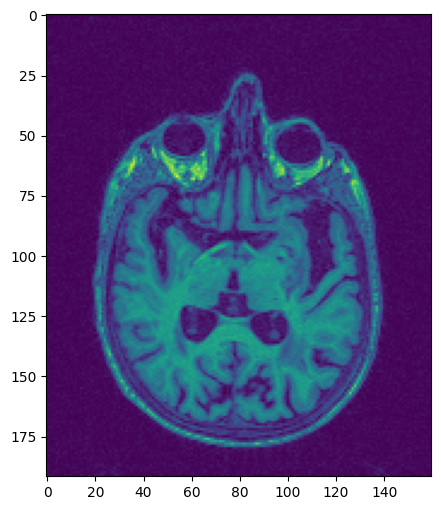

In [4]:
raw_example = raw_examples[0]
raw_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', raw_example)
raw_img_sitk = sitk.ReadImage(raw_img_path, sitk.sitkFloat32)
raw_img_sitk = sitk.DICOMOrient(raw_img_sitk,'RPS')

print(f'shape = {sitk.GetArrayFromImage(raw_img_sitk).shape} -> (Z, X, Y)')
explore_3D_array(
    arr=sitk.GetArrayFromImage(raw_img_sitk),
    cmap='viridis'
)

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

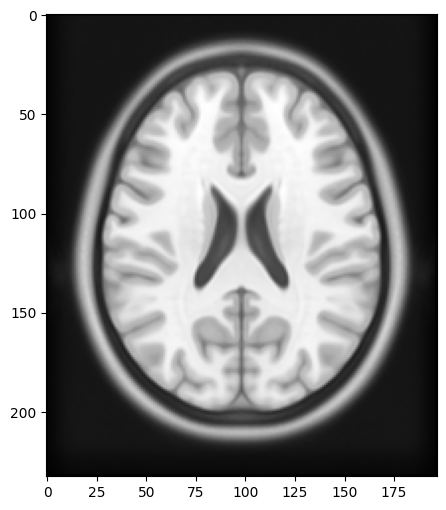

In [5]:
template_img_path = os.path.join(BASE_DIR, 'assets', 'templates', 'mni_icbm152_t1_tal_nlin_sym_09a.nii')

template_img_sitk = sitk.ReadImage(template_img_path, sitk.sitkFloat32)
template_img_sitk = sitk.DICOMOrient(template_img_sitk,'RPS')
explore_3D_array(arr = sitk.GetArrayFromImage(template_img_sitk))

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

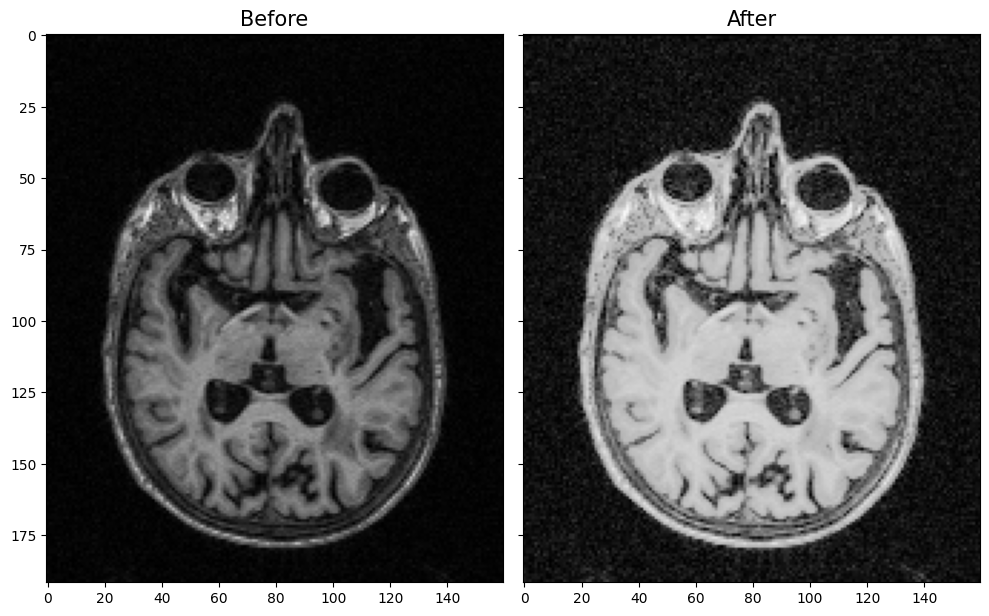

In [6]:
transformed = sitk.HistogramMatching(raw_img_sitk, template_img_sitk)

explore_3D_array_comparison(
    arr_before=sitk.GetArrayFromImage(raw_img_sitk),
    arr_after=sitk.GetArrayFromImage(transformed),
    cmap='gray'
)

In [7]:
stats = sitk.StatisticsImageFilter()

stats.Execute(raw_img_sitk)
print('\tRaw img')
print("min =", stats.GetMinimum())
print("max =", stats.GetMaximum())
print()


stats.Execute(template_img_sitk)
print('\tTemplate img')
print("min =", stats.GetMinimum())
print("max =", stats.GetMaximum())
print()

stats.Execute(transformed)
print('\tTransformed img')
print("min =", stats.GetMinimum())
print("max =", stats.GetMaximum())



	Raw img
min = 0.0
max = 941.0

	Template img
min = 0.0677947998046875
max = 97.32923889160156

	Transformed img
min = 0.0677947998046875
max = 97.32923889160156
